# target

compare truth level info with nominal

1. event number match

2. p4 vector dR match (bbll)

In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper

Welcome to JupyROOT 6.24/08


In [2]:
# 1. get tfile
filename = "user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
# 2. get ttree
nominal = file.Get("nominal")
truth = file.Get("truth")
print(nominal.GetEntries(), truth.GetEntries())

258576 4580000


In [3]:
m_bbll_truth = TH1D ("m_bbll_truth ","invariant mass of bbll in truth level" ,50 ,0 ,700)
m_bbll_reco = TH1D ("m_bbll_reco ","invariant mass of bbll in reco level" ,50 ,0 ,700)

m_bbee = TH1D ("m_bbee ","invariant mass of bbee" , 50 ,100 ,700)
m_bbme = TH1D ("m_bbml ","invariant mass of bbme" , 50 ,100 ,700)
m_bbmm = TH1D ("m_bbmm ","invariant mass of bbee" , 50 ,100 ,700)

In [4]:
# event match
nentry = 0
nominal.GetEntry(nentry)
nnumber = getattr(nominal, "eventNumber")
# for n in range(truth.GetEntries()):
for n in range(40000):
    truth.GetEntry(n)
    tnumber = getattr(truth, "eventNumber")
    if tnumber == nnumber:
        #####################################################
        ############# start analysis from here ##############
        #####################################################
        # construct p4 vector 
        ## truth level llbb
        # first element from t, second element from tbar
        p4s_truth_b = []
        p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_t"))
        p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_tbar"))
        ## lepton (el/mu/tau)
        prefixes = ['MC_Wdecay1_from_t', 'MC_Wdecay2_from_t', 'MC_Wdecay1_from_tbar','MC_Wdecay2_from_tbar']
        p4s_truth_lep = helper.get_leptons_from_truth(prefixes, truth)

        if len(p4s_truth_b) != 2 or len(p4s_truth_lep) != 2: 
            nentry += 1
            nominal.GetEntry(nentry)
            nnumber = getattr(nominal, "eventNumber")
            continue

        

            
        ## nominal level llbb (same as in minimax_lb.ipynb)
        p4s_el = helper.GetLorenzP4List(nominal,'el')
        p4s_mu = helper.GetLorenzP4List(nominal,'mu')
        p4s_lep = helper.getp4s_lep(p4s_el, p4s_mu)
        p4s_bjet = helper.GetLorenzP4List(nominal,'bjet')

        if len(p4s_lep) != 2 or len(p4s_bjet) != 2: 
            nentry += 1
            nominal.GetEntry(nentry)
            nnumber = getattr(nominal, "eventNumber")
            continue
        
        
        # elel = 1, elmu = 2, mumu = 3, invalid event = 0
        if helper.W_to_which(p4s_el, p4s_mu) == 1:
            p4sys = p4s_el[0]+p4s_el[1]+p4s_bjet[0]+p4s_bjet[1]
            m_bbee.Fill(p4sys.M()/1000) # in GeV
            p4_bbll_truth = p4s_truth_b[0]+p4s_truth_b[1]+ p4s_truth_lep[0]+p4s_truth_lep[1]
            m_bbll_truth.Fill(p4_bbll_truth.M()/1000)

        elif helper.W_to_which(p4s_el, p4s_mu) == 2:
            p4sys = p4s_el[0]+p4s_mu[0]+p4s_bjet[0]+p4s_bjet[1]
            m_bbme.Fill(p4sys.M()/1000)
            p4_bbll_truth = p4s_truth_b[0]+p4s_truth_b[1]+ p4s_truth_lep[0]+p4s_truth_lep[1]
            m_bbll_truth.Fill(p4_bbll_truth.M()/1000)

        elif helper.W_to_which(p4s_el, p4s_mu) == 3:
            p4sys = p4s_mu[0]+p4s_mu[1]+p4s_bjet[0]+p4s_bjet[1]
            m_bbmm.Fill(p4sys.M()/1000)
            p4_bbll_truth = p4s_truth_b[0]+p4s_truth_b[1]+ p4s_truth_lep[0]+p4s_truth_lep[1]
            m_bbll_truth.Fill(p4_bbll_truth.M()/1000)


        #####################################################
        ############# end analysis from here ################
        #####################################################
        nentry += 1
        nominal.GetEntry(nentry)
        nnumber = getattr(nominal, "eventNumber")
        
print(nentry)

2203


2121.0


401.0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


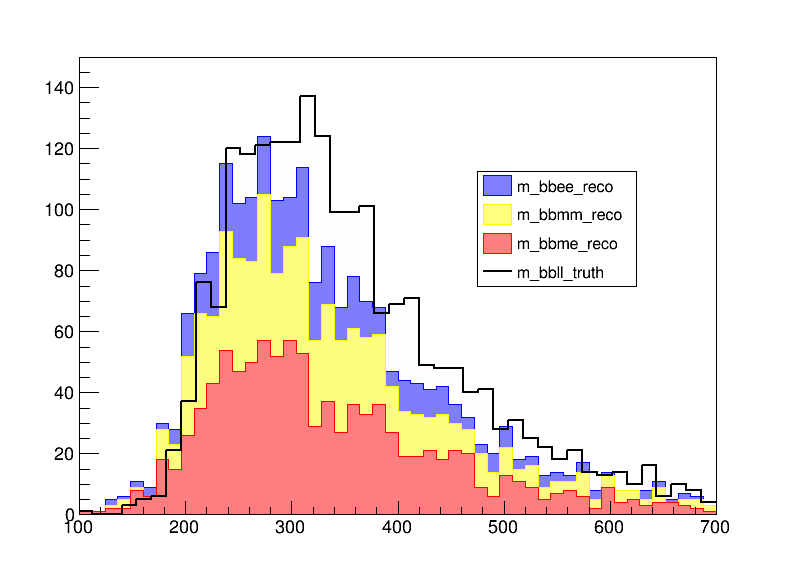

In [7]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 600 )
gStyle.SetOptStat(1)

hs = THStack("hs", "stacked m_bbll")
hs.Clear()

m_bbme.SetLineColor(ROOT.kRed)
m_bbme.SetFillColorAlpha(ROOT.kRed,0.5)
m_bbmm.SetLineColor(ROOT.kYellow)
m_bbmm.SetFillColorAlpha(ROOT.kYellow,0.5)
m_bbee.SetLineColor(ROOT.kBlue)
m_bbee.SetFillColorAlpha(ROOT.kBlue,0.5)
m_bbll_truth.SetLineColor(ROOT.kBlack)
m_bbll_truth.SetFillColorAlpha(ROOT.kBlack,0)
m_bbll_truth.SetLineWidth(2)


hs.Add(m_bbme)
hs.Add(m_bbmm)
hs.Add(m_bbee)

hs.Draw()
m_bbll_truth.Draw("same")
hs.SetMaximum(150)



leg2 = TLegend(0.6,0.5,0.8,0.7)
leg2.AddEntry(m_bbee,"m_bbee_reco","f")
leg2.AddEntry(m_bbmm,"m_bbmm_reco","f")
leg2.AddEntry(m_bbme,"m_bbme_reco","f")
leg2.AddEntry(m_bbll_truth, "m_bbll_truth","l")
leg2.Draw()

c2.Draw()

print(m_bbll_truth.GetEntries())
m_bbee.GetEntries()
#  + m_bbme.GetEntries() + m_bbmm.GetEntries() 